#Trabalho 3 - Unidade 2

#Algoritmo Dijkstra

In [1]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import networkx as nx
import heapq
import matplotlib.pyplot as plt
import time


Calculando caminho entre 302594926 e 503334686
NetworkX Dijkstra: 0.0085 segundos
Min Heap Dijkstra: 0.0321 segundos

Calculando caminho entre 526593227 e 302589698
NetworkX Dijkstra: 0.0008 segundos
Min Heap Dijkstra: 0.0147 segundos

Calculando caminho entre 505096275 e 527199246
NetworkX Dijkstra: 0.0091 segundos
Min Heap Dijkstra: 0.0227 segundos

Calculando caminho entre 301646158 e 535253331
NetworkX Dijkstra: 0.0539 segundos
Min Heap Dijkstra: 0.1021 segundos

Calculando caminho entre 7050750559 e 526566992
NetworkX Dijkstra: 0.2180 segundos
Min Heap Dijkstra: 0.1010 segundos

Calculando caminho entre 505552532 e 526591442
NetworkX Dijkstra: 0.0034 segundos
Min Heap Dijkstra: 0.0154 segundos

Calculando caminho entre 3801240906 e 5262913019
NetworkX Dijkstra: 0.0422 segundos
Min Heap Dijkstra: 0.0443 segundos

Calculando caminho entre 1277537328 e 5270101539
NetworkX Dijkstra: 0.0190 segundos
Min Heap Dijkstra: 0.0472 segundos

Calculando caminho entre 501698991 e 535287634
Net

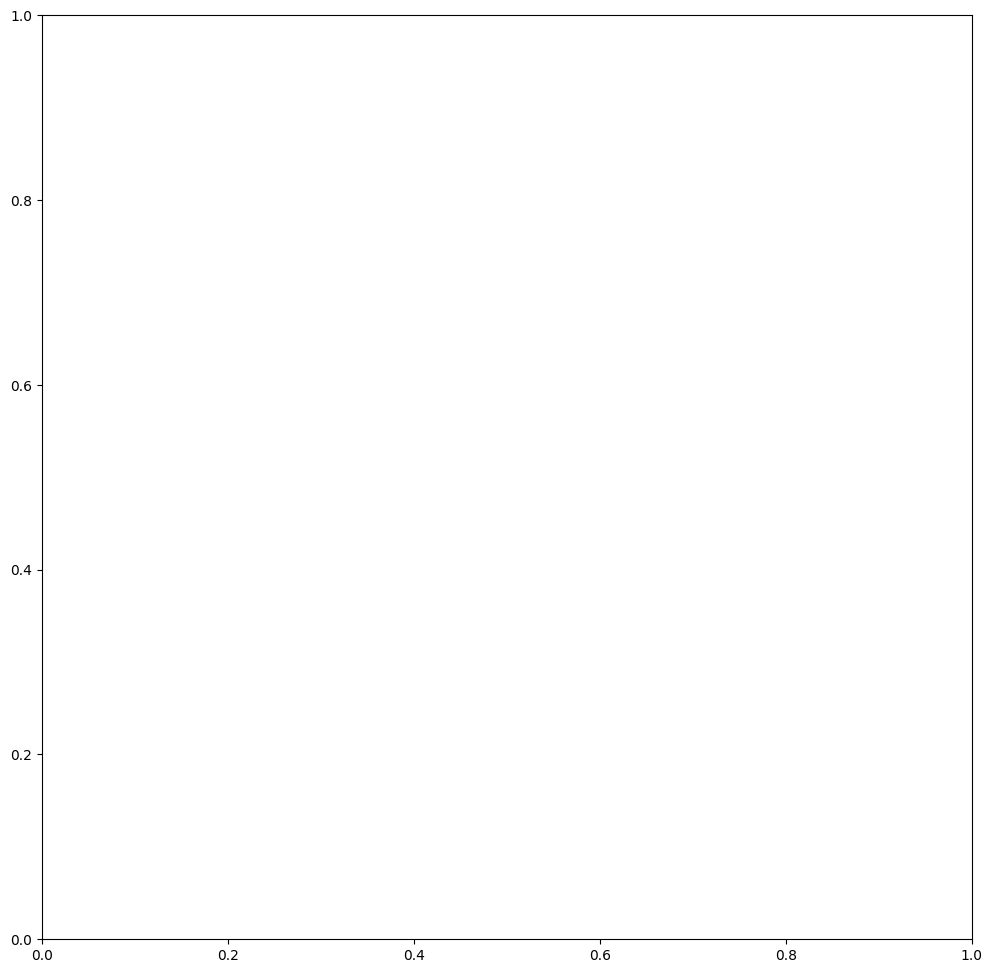

In [ ]:
# Baixar o grafo de Natal-RN
city = "Natal, Rio Grande do Norte, Brazil"
G = ox.graph_from_place(city, network_type='drive')  # Grafo para veículos

# Garantir que cada aresta tenha o atributo "length" (caso não exista)
for u, v, data in G.edges(data=True):
    if 'length' not in data:
        # Se o comprimento não existir, calcular a distância Euclidiana entre os dois nós
        node_u = G.nodes[u]
        node_v = G.nodes[v]
        distance = ox.distance.great_circle_vec(node_u['y'], node_u['x'], node_v['y'], node_v['x'])
        G[u][v]['length'] = distance

# Converter o grafo de OSMnx para um dicionário de adjacência
def graph_to_adjacency_dict(G):
    """Converte o grafo do OSMnx para um dicionário de adjacência para o algoritmo de Dijkstra."""
    adjacency_dict = {}
    for u, v, data in G.edges(data=True):
        # Usamos 'length' como o peso da aresta
        distance = data.get('length', 1)  # Se não houver 'length', assume-se 1 (distância padrão)

        # Se o nó de origem ainda não existir no dicionário, cria-se uma lista.
        if u not in adjacency_dict:
            adjacency_dict[u] = []
        if v not in adjacency_dict:
            adjacency_dict[v] = []

        # Adiciona a aresta ao dicionário de adjacência.
        adjacency_dict[u].append((v, distance))
        adjacency_dict[v].append((u, distance))  # Para grafos não direcionados
    return adjacency_dict

# Converte o grafo de OSMnx para um dicionário de adjacência
adj_dict = graph_to_adjacency_dict(G)

# Função Dijkstra usando NetworkX
def dijkstra_networkx(G, orig, dest):
    # Calcula o caminho mais curto usando a função de Dijkstra do NetworkX
    path = nx.shortest_path(G, source=orig, target=dest, weight='length')
    return path

# Função Dijkstra usando Min Heap
def dijkstra_minheap(G, start, end):
    """Implementação manual do Dijkstra usando min heap."""
    # Inicializar as distâncias
    distances = {node: float('inf') for node in G.nodes}
    distances[start] = 0
    prev_nodes = {node: None for node in G.nodes}
    priority_queue = [(0, start)]  # (distância, nó)

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_node == end:
            break

        # Atraso para o caso de encontrar um nó com maior distância já visitado
        if current_distance > distances[current_node]:
            continue

        for neighbor, data in G[current_node].items():
            weight = data.get('length', 1)  # Verificar se o 'length' existe
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                prev_nodes[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    # Reconstruir o caminho
    path = []
    current_node = end
    while current_node is not None:
        path.append(current_node)
        current_node = prev_nodes[current_node]
    path.reverse()

    return path

# Visualizar o grafo e os caminhos mais curtos
fig, ax = plt.subplots(figsize=(12, 12))
ox.plot_graph(G, ax=ax, show=False, close=False, bgcolor='k', node_size=0)

# Exemplos de pares de origem e destino para cálculo de caminhos mais curtos
orig_dest_pairs = [
    ((-5.7945, -35.2110), (-5.8000, -35.2000)),  # Ponta Negra
    ((-5.7953, -35.2112), (-5.7910, -35.2098)),  # Praça 7 de Setembro
    ((-5.8342, -35.2113), (-5.8130, -35.2114)),  # Shopping Midway Mall
    ((-5.7864, -35.2041), (-5.8150, -35.2436)),  # Estádio Arena das Dunas
    ((-5.7778, -35.3028), (-5.7985, -35.2399)),  # Parque da Cidade
    ((-5.8131, -35.2067), (-5.8004, -35.2021)),  # UFRN
    ((-5.8842, -35.2690), (-5.8195, -35.2320)),  # Norte Shopping
    ((-5.8035, -35.2244), (-5.7834, -35.2087)),  # Praia do Forte
    ((-5.8016, -35.2045), (-5.8052, -35.2119)),  # Hotel Majestic
    ((-5.8069, -35.2127), (-5.7961, -35.2031)),  # Centro de Turismo
]

# Função para obter o nó mais próximo de uma coordenada
def nearest_node(G, lat, lon):
    return ox.distance.nearest_nodes(G, X=lon, Y=lat)

# Convertendo coordenadas de origem e destino para nós
nodes_pairs = [(nearest_node(G, orig[0], orig[1]), nearest_node(G, dest[0], dest[1])) for orig, dest in orig_dest_pairs]

# Calcular e comparar os tempos de execução para as duas implementações de Dijkstra
for orig_node, dest_node in nodes_pairs:
    print(f"\nCalculando caminho entre {orig_node} e {dest_node}")

    # NetworkX Dijkstra
    start_time = time.time()
    path_nx = dijkstra_networkx(G, orig_node, dest_node)
    end_time = time.time()
    time_nx = end_time - start_time
    print(f"NetworkX Dijkstra: {time_nx:.4f} segundos")

    # Min Heap Dijkstra
    start_time = time.time()
    path_mh = dijkstra_minheap(G, orig_node, dest_node)
    end_time = time.time()
    time_mh = end_time - start_time
    print(f"Min Heap Dijkstra: {time_mh:.4f} segundos")





In [ ]:
#Plot dos caminhos mais curtos

# Função para garantir que ambos os caminhos (NetworkX e Min Heap) sejam corretamente calculados e plotados
def plot_paths_separately():
    for i, (orig_node, dest_node) in enumerate(nodes_pairs):
        fig, ax = plt.subplots(figsize=(12, 12))  # Novo gráfico para cada par de origem e destino
        ox.plot_graph(G, ax=ax, show=False, close=False, bgcolor='k', node_size=0)

        # Calculando o caminho usando o algoritmo de Dijkstra com NetworkX
        path_nx = dijkstra_networkx(G, orig_node, dest_node)
        if path_nx:
            ox.plot_graph_route(G, path_nx, route_linewidth=6, node_size=0, bgcolor='k', edge_color='b', ax=ax)
        else:
            print(f"Caminho NetworkX não encontrado para o par {orig_node} → {dest_node}")

        # Calculando o caminho usando o algoritmo Min Heap
        path_mh = dijkstra_minheap(G, orig_node, dest_node)
        if path_mh:
            ox.plot_graph_route(G, path_mh, route_linewidth=6, node_size=0, bgcolor='k', edge_color='r', ax=ax)
        else:
            print(f"Caminho Min Heap não encontrado para o par {orig_node} → {dest_node}")

        # Título para indicar o par de origem e destino
        ax.set_title(f'Caminho {i + 1}: {orig_node} → {dest_node}')

        # Mostrar o gráfico
        plt.show()

# Chamar a função para plotar os 10 caminhos
plot_paths_separately()

Output hidden; open in https://colab.research.google.com to view.